<a href="https://colab.research.google.com/github/isabellabertola/projetos_data_science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Boston/MA*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Boston de Massachusetts, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Colaboratory logo" width="50%" src="https://static.rentcars.com/imagens/modules/localidade/about/739-desktop-location-description.png"></center>


## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site Inside Airbnb.

Para esta análise exploratória inicial, será baixado o seguinte arquivo:

listings.csv - Summary information and metrics for listings in Boston (good for visualisations).


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
!pip install missingno
import missingno as msno
import seaborn as sns
%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ma/boston/2021-07-12/visualisations/listings.csv")

## Análise dos Dados


Abaixo temos o dicionário que descreve cada uma das variáveis que temos no nosso conjunto de dados.

**Dicionário das variáveis**

* id: número do id gerado do anúncio do imóvel 
* name: nome do imóvel anunciado
* host_id: número do id gerado do proprietário do imóvel (anfitrião)
* host_name: nome do anfitrião
* neighbourhood: nome do bairro
* latitude: coordenada de latitude do imóvel
* longitude: coordenada de longitude do imóvel
* room_type: tipo de quarto fornecido
* price: preço para alugar o imóvel
* minimum_nights: quantidade de noites miníma para alocação
* number_of_reviews: número de reviews que a propriedade possui
* last_review: data do último review
* reviews_per_month: quantidade de reviews por mês
* calculated_host_listings_count: quantidade de imóveis do mesmo anfitrião
* availability_365: número de dias de disponibilidade em 365 dias


Antes de iniciar a análise, vamos verificar as primeiras entradas e conhecer melhor nosso *dataset*


In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,125,32,20,2021-04-30,0.29,1,112
1,5506,**Special ** Private! Minutes to center!,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,145,3,107,2020-05-01,0.90,9,46
2,6695,Special!! Home Away! Condo,8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,169,3,115,2019-11-02,1.37,9,109
3,10730,Bright 1bed facing Golden Dome,26988,Anne,NaN,Downtown,42.35906,-71.06271,Entire home/apt,76,91,32,2020-04-16,0.41,5,262
4,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",38997,Michelle,NaN,Back Bay,42.35061,-71.08787,Entire home/apt,106,29,5,2020-12-02,0.18,11,331


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**


Este *dataset* que baixamos é a versão consolidada do Airbnb com 16 variáveis e 3043 entradas.

As variáveis estão dividas nos tipos float, inteiros e objetos.

In [ ]:
# identificar o volume de dados do DataFrame
print("Variáveis:",df.shape[1])
print("Entradas:",df.shape[0],"\n")

# verificar o tipo de dado de cada variável
df.dtypes

Variáveis: 16
Entradas: 3043 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Os valores ausentes frequentemente estão presentes no conjuntos de dados e impactam diretamente em sua qualidade.

Em nosso conjunto de dados verificamos:

*  A variável neighbourhood_group possui 100% dos valores como ausente;
*  A variável reviews_per_month possui 26% dos valores nulos, assim como a variável last_review.    






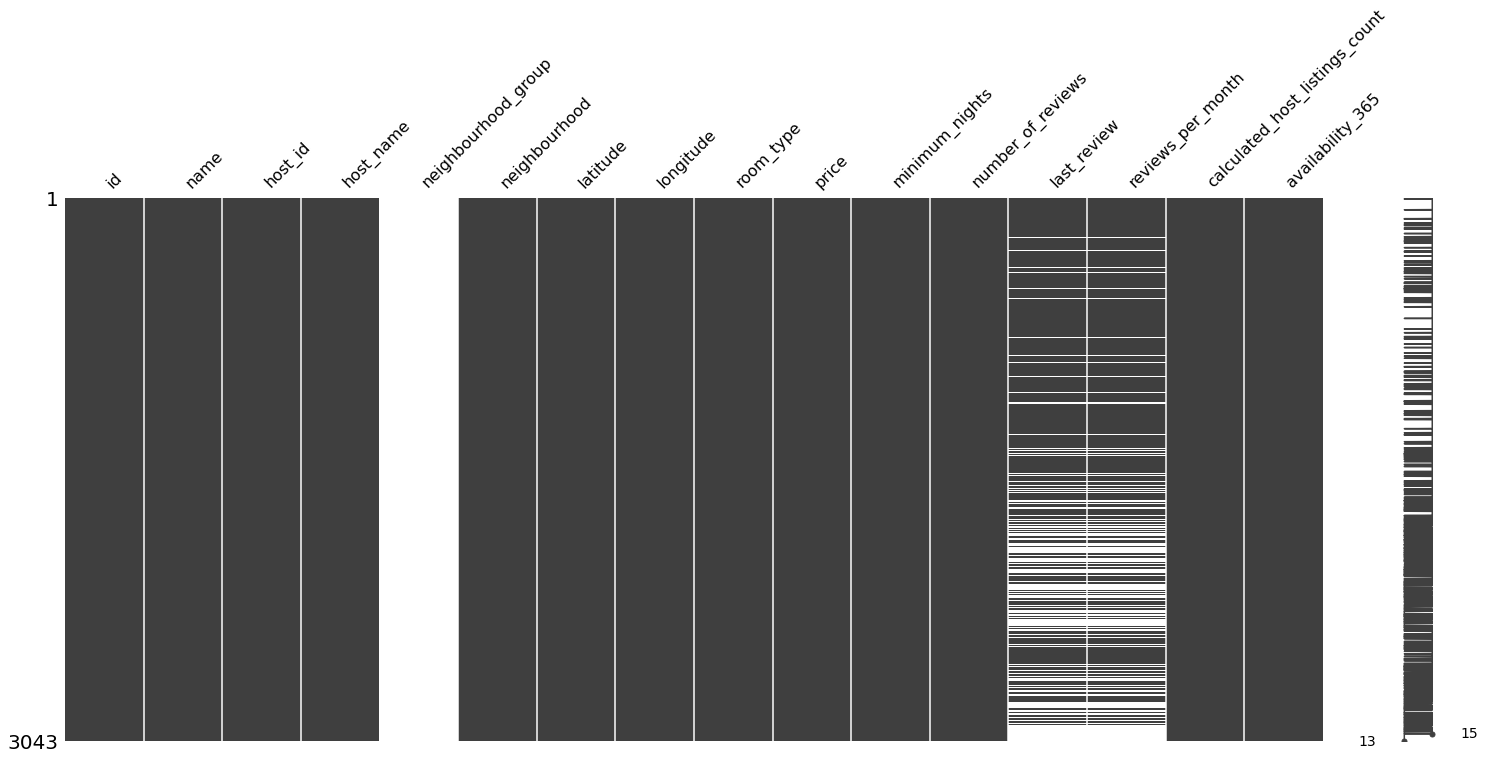

In [ ]:
#Plotar matriz de nulidade para examinar os dados ausentes por linha visualmente
msno.matrix(df)

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.260269
last_review                       0.260269
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para verificar a distribuição das variáveis utilizamos o histograma.

Pela distribuição do histograma, observamos indícios da presença de *outliers*. para as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.



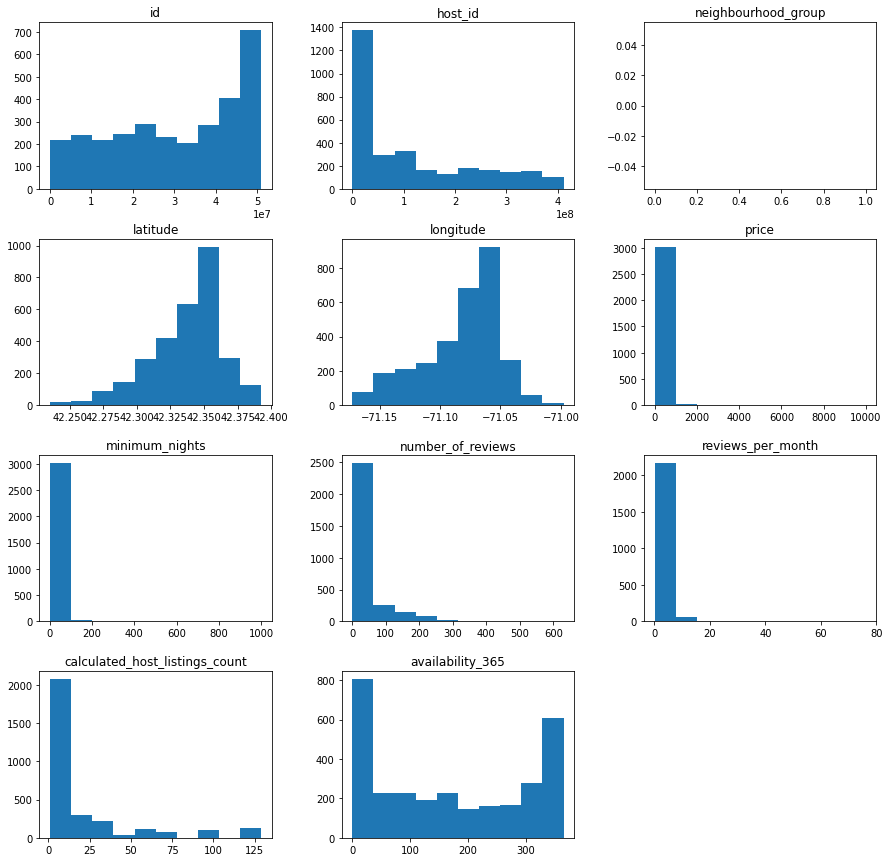

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=[15,15], grid=False);

### **Q4. Qual a média dos preços de aluguel?**

Antes de calcularmos a média dos preços de aluguei, vamos confirmar a presença dos outliers para a variável *price* e tratá-los caso necessário.



In [ ]:
# ver o resumo estatístico da variável preço
df['price'].describe()

count     3043.000000
mean       182.780480
std        290.398224
min          0.000000
25%         79.000000
50%        133.000000
75%        215.000000
max      10000.000000
Name: price, dtype: float64


variável price para valores acima de 350
241 entradas
7.9198%


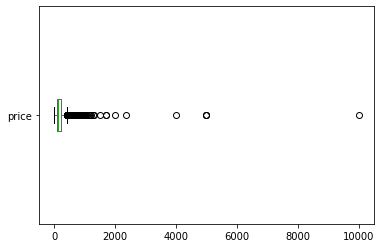

In [ ]:
#verificando a presença de outliers na variável preço
df.price.plot(kind='box', vert=False);
print("\nvariável price para valores acima de 350")
print("{} entradas".format(len(df[df.price > 350])))
print("{:.4f}%".format((len(df[df.price > 350]) / df.shape[0])*100))


Ao plotar boxplots para a variável e verificar o resumo estatístico confirmamos a presença de outliers que iremos tratar com os seguintes passos:

*   Definir o Q1 e Q3
*   Calcular o IQR
*   Remover os outliers


In [ ]:
# identificando os outliers para a variável price
q1_price=df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price= q3_price - q1_price
print("IQR:",IQR_price)

IQR: 136.0


In [ ]:
# definindo os limites                                       
sup_price= q3_price +1.5 * IQR_price
inf_price=q1_price -1.5 * IQR_price
print("limite superior:",sup_price,'\nlimite inferior', inf_price)

limite superior: 419.0 
limite inferior -125.0


In [ ]:
# removendo os outliers
df.drop(df[df.price >419].index,axis=0,inplace=True)


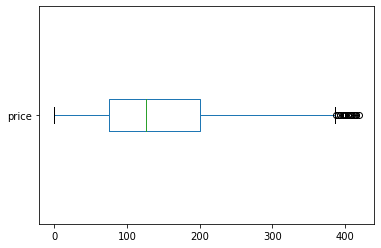

In [ ]:
# verificando o conjunto limpo
df.price.plot(kind='box', vert=False);

In [ ]:
# ver a média da coluna `price``
df.price.mean()

145.3512757777001

Após a limpeza dos dados feita, podemos dizer sobre a média de gasto com hospedagem para Boston.

O gasto médio da diária por noite é de **$145,35** (790,70 reais).



### **Q4. Qual a correlação existente entre as variáveis**

A correlação infere a relação entre as variáveis, podendo ser negativa ou positiva.

Em função do coeficiente de correlação podemos estabelecer qual a intensidade da relação. 

Utilizando a matriz de correlação e um *heatmap* verificamos baixa correlação entre as variáveis.

In [ ]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
corr


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.116282,-0.012580,0.126729,0.146652,0.102593
minimum_nights,-0.116282,1.000000,-0.226746,-0.278294,-0.003626,0.056853
number_of_reviews,-0.012580,-0.226746,1.000000,0.344430,-0.170856,-0.049033
reviews_per_month,0.126729,-0.278294,0.344430,1.000000,-0.027883,0.034752
calculated_host_listings_count,0.146652,-0.003626,-0.170856,-0.027883,1.000000,0.126350
availability_365,0.102593,0.056853,-0.049033,0.034752,0.126350,1.000000


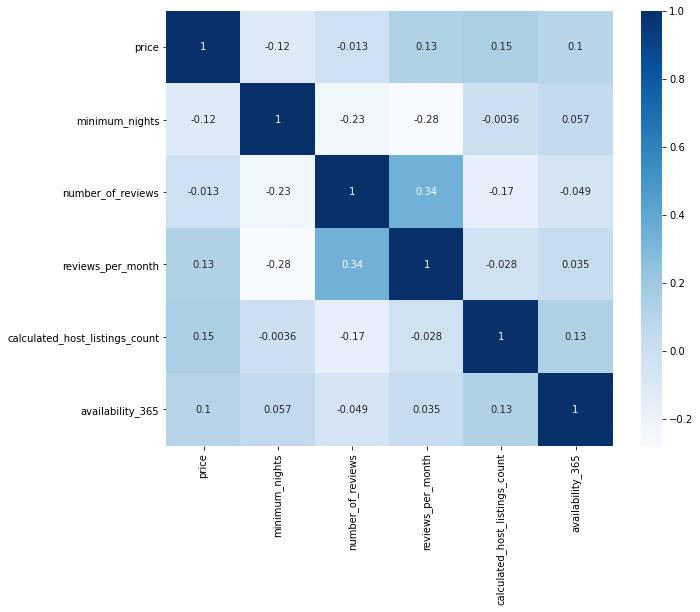

In [ ]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.show()


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna *room_type* indica a categoria do imóvel anunciado na plataforma, existem  as opções de apartamentos/casas inteiras, quarto privado, quarto compartilhado e quarto de hotel.


Em Boston, apartamentos/casas inteiras representam 63% dos imóveis anunciados, em seguida a categoria de quarto privado com 36%, totalizando 99% dos imóveis disponíveis na plataforma.


In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    1925
Private room       1085
Hotel room           23
Shared room          10
Name: room_type, dtype: int64

Entire home/apt    0.632599
Private room       0.356556
Hotel room         0.007558
Shared room        0.003286
Name: room_type, dtype: float64

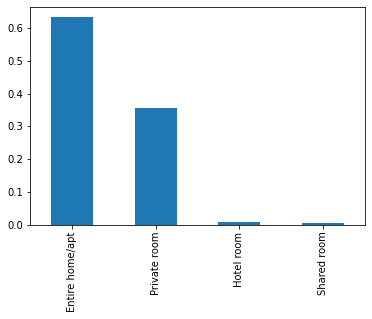

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df.room_type.value_counts()/df.shape[0]).plot(kind='bar',tick_label=True);
df.room_type.value_counts()/df.shape[0]

### **Q6. Qual a localidade mais cara do dataset?**
Se juntarmos as informações adquiridas em relação ao número de imóveis e aos bairros, podemos nos situar e entender onde estão as hospedagens mais baratas e qual a sua distância do centro.

As localidades mais caras de Boston são Chinatown e South Boston Waterfront.

In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Chinatown                  251.512195
South Boston Waterfront    230.767857
Downtown                   204.785714
Leather District           199.000000
Charlestown                196.000000
Back Bay                   195.375000
West End                   187.838710
North End                  172.873239
Beacon Hill                171.274336
Fenway                     169.716814
South End                  167.245000
South Boston               160.977273
East Boston                147.473373
Longwood Medical Area      147.000000
Bay Village                145.775000
Jamaica Plain              123.823529
Mission Hill               120.488372
Allston                    109.099338
Dorchester                 109.022959
Brighton                   104.377880
Hyde Park                   97.075000
West Roxbury                96.857143
Roxbury                     96.330435
Roslindale                  94.540000
Mattapan                    88.425000
Name: price, dtype: float64

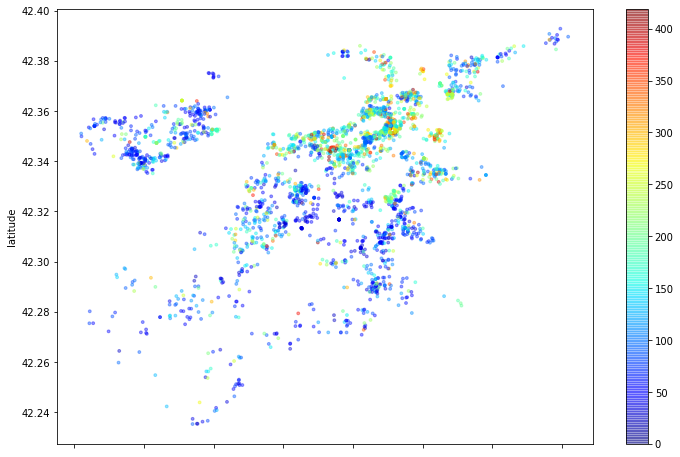

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude',y='latitude', alpha=0.4, c=df['price'],s=8,
        cmap=plt.get_cmap('jet'),figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Assim como fizemos para a variável *price* vamos tratar os outliers primeiramente.

Realizado esses passo, verificamos que a média de noites é de no mínimo 38 para aluguel. 



In [ ]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.describe()

count    2867.000000
mean       39.150331
std        45.542409
min         1.000000
25%         2.000000
50%        29.000000
75%        91.000000
max      1000.000000
Name: minimum_nights, dtype: float64


variável minimum_nights para valores acima de 30
1081 entradas
0.1744%


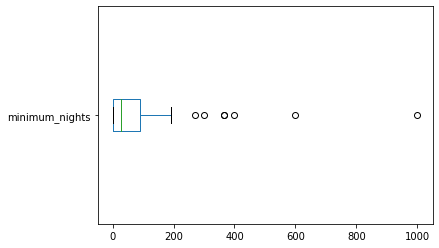

In [ ]:
#verificando a presença de outliers na variável minimum_nights
df.minimum_nights.plot(kind='box', vert=False);
print("\nvariável minimum_nights para valores acima de 30")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 300]) / df.shape[0])*100))


In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights=df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights= q3_price - q1_price
print("IQR:",IQR_price)

# definindo os limites                                       
sup_minimum_nights= q3_minimum_nights +1.5 * IQR_minimum_nights
inf_minimum_nights=q1_minimum_nights -1.5 * IQR_minimum_nights
print("limite superior:",sup_minimum_nights,'\nlimite inferior', inf_minimum_nights)



IQR: 136.0
limite superior: 295.0 
limite inferior -202.0


Média do minímo de noites: 38.173365955959454


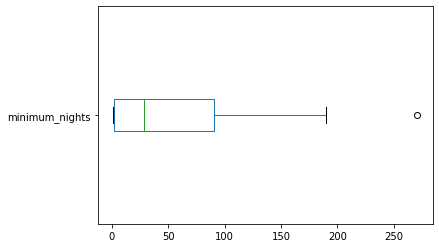

In [ ]:
# removendo os outliers
df.drop(df[df.minimum_nights>295].index,axis=0,inplace=True)
# verificando o conjunto limpo
df.minimum_nights.plot(kind='box', vert=False);

print("Média do minímo de noites:",df.minimum_nights.mean())

In [ ]:
#verificando a média do minímo de noite por bairro
df.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)


neighbourhood
Leather District           91.000000
West End                   65.451613
South Boston Waterfront    60.821429
Chinatown                  59.000000
Allston                    57.483444
Longwood Medical Area      55.000000
Brighton                   44.986175
Fenway                     42.858407
Roxbury                    41.843478
Dorchester                 41.239796
Jamaica Plain              40.823529
Mission Hill               40.069767
Hyde Park                  37.400000
North End                  36.464789
East Boston                35.153846
Beacon Hill                34.823009
Charlestown                32.753247
Back Bay                   31.779762
Downtown                   30.191729
Mattapan                   30.100000
Roslindale                 29.700000
West Roxbury               29.000000
South Boston               27.984848
South End                  24.860000
Bay Village                13.550000
Name: minimum_nights, dtype: float64

In [ ]:
#verificando o resumo estatístico do minímo de noite por bairro
df.groupby(['neighbourhood']).minimum_nights.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Allston,151.0,57.483444,43.061329,1.0,29.00,90.0,91.00,190.0
Back Bay,168.0,31.779762,37.182899,1.0,1.00,29.0,32.00,180.0
Bay Village,40.0,13.550000,31.916518,1.0,2.00,2.0,3.00,180.0
Beacon Hill,113.0,34.823009,36.835113,1.0,2.00,29.0,32.00,180.0
Brighton,217.0,44.986175,37.161743,1.0,15.00,30.0,91.00,180.0
Charlestown,77.0,32.753247,41.071554,1.0,2.00,7.0,91.00,180.0
Chinatown,41.0,59.000000,33.861483,1.0,29.00,90.0,91.00,91.0
Dorchester,392.0,41.239796,38.729155,1.0,2.00,30.0,91.00,92.0
Downtown,266.0,30.191729,36.550777,1.0,1.00,9.0,32.00,180.0


## Conclusões


A partir da análise de dados do Airbnb para a cidade de Boston percebeu a existência de *outliers* e dados ausentes.


Do ponto de vista para planejar uma viagem para Boston concluimos que:

*   O preço médio da diária é superior a média da diária dos hotéis dos Estados Unidos (Nov/2018 - $124,22);
*   Para viagens bate e volta é necessário uma reserva com antecedência, devido ao número baixo de imóveis disponíveis com a média do número de noites miníma menor que 30;
*   As regiões centralizadas ao redor do *Boston Common*, o principal parque da cidade, são as mais caras.




